In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart disease.csv to heart disease.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Interpolate missing values
df = df.interpolate()

<ipython-input-10-38479d05e168>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


In [ ]:
#remove duplicates if any
df_cleaned = df.drop_duplicates()

In [ ]:
#Identify columns of object or category type
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
import numpy as np

In [ ]:
#Replace 'N' with 0 and 'Y' with 1 in the ExerciseAngina column
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N': 0, 'Y': 1})

In [ ]:
import numpy as np

In [ ]:
# Find mode for ChestPainType
ChestPainType_mode = df['ChestPainType'].mode()[0]
print(f"Mode for ChestPainType: {ChestPainType_mode}")

Mode for ChestPainType: ASY


In [ ]:
# Convert N and Y to 0 and 1 in ExerciseAngina column
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N': 0, 'Y': 1})

In [ ]:
# Find the maximum Cholesterol value
max_Cholesterol = df['Cholesterol'].max()
print(f"Max Cholesterol: {max_Cholesterol}")

Max Cholesterol: 603


In [ ]:
# Calculate median for Age
Age_median = df['Age'].median()
print(f"Median Age: {Age_median}")

Median Age: 54.0


In [ ]:
# Find mode for ExerciseAngina
ExerciseAngina_mode = df['ExerciseAngina'].mode()[0]
print(f"Mode for ExerciseAngina: {ExerciseAngina_mode}")

Mode for ExerciseAngina: 0


In [ ]:
# Find the highest RestingBP value
max_RestingBP = df['RestingBP'].max()
print(f"Highest RestingBP: {max_RestingBP}")

Highest RestingBP: 200


In [ ]:
# Group by Sex and find lowest and highest RestingBP
lowest_highest_RestingBP = df.groupby('Sex')['RestingBP'].agg(['min', 'max'])

print("Lowest and highest RestingBP by Sex:")
print(lowest_highest_RestingBP)

Lowest and highest RestingBP by Sex:
     min  max
Sex          
F     94  200
M      0  200


In [ ]:
# Group by Sex and calculate mean ExerciseAngina
Sex_ExerciseAngina_mean = df.groupby('Sex')['ExerciseAngina'].mean()

# Identify the Sex with the highest mean ExerciseAngina
most_likely_Sex = Sex_ExerciseAngina_mean.idxmax()

print(f"The Sex most likely to have ExerciseAngina is: {most_likely_Sex}")

The Sex most likely to have ExerciseAngina is: M


In [ ]:
# Calculate summary statistics
summary_statistics = df.describe(include='all')

print("Summary statistics:\n", summary_statistics)

Summary statistics:
                Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR  ExerciseAng

In [1]:
from google.colab import files

uploaded = files.upload()

Saving heart disease - Copy.csv to heart disease - Copy.csv


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('heart disease - Copy.csv')

In [10]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [12]:
# Convert M with 0 and F with 1 in the Sex column
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})

In [13]:
# Select columns for one-hot encoding
columns_to_encode = ['ChestPainType', 'RestingECG', 'ST_Slope']

In [14]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [15]:
import matplotlib.pyplot as plt

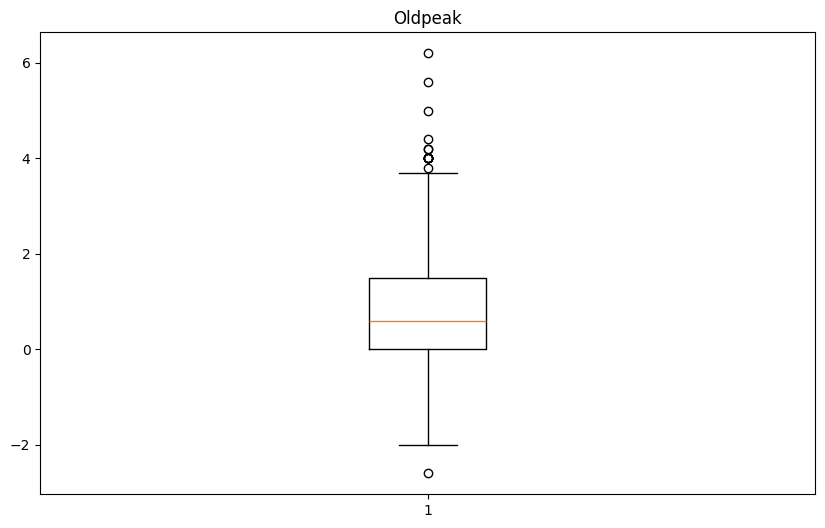

In [16]:
# Create a boxplot for Oldpeak
plt.figure(figsize=(10, 6))
plt.boxplot(df['Oldpeak'])
plt.title('Oldpeak')
plt.show()

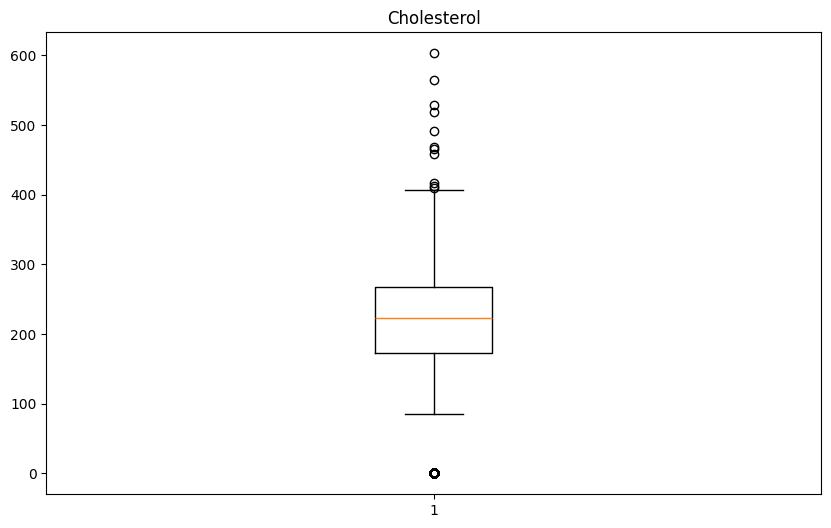

In [17]:
# Create a boxplot for Cholesterol
plt.figure(figsize=(10, 6))
plt.boxplot(df['Cholesterol'])
plt.title('Cholesterol')
plt.show()

In [18]:
# Calculate normalized value counts for HeartDisease
heart_disease_counts = df['HeartDisease'].value_counts(normalize=True)

In [19]:
# Display the value counts and class balance
print(heart_disease_counts)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [20]:
# Calculate the count of males and females in the Sex column
males_count = (df['Sex'] == 0).sum()
females_count = (df['Sex'] == 1).sum()

In [21]:
# Display the counts
print(f"Number of males: {males_count}")
print(f"Number of females: {females_count}")

Number of males: 725
Number of females: 193


In [22]:
import matplotlib.pyplot as plt

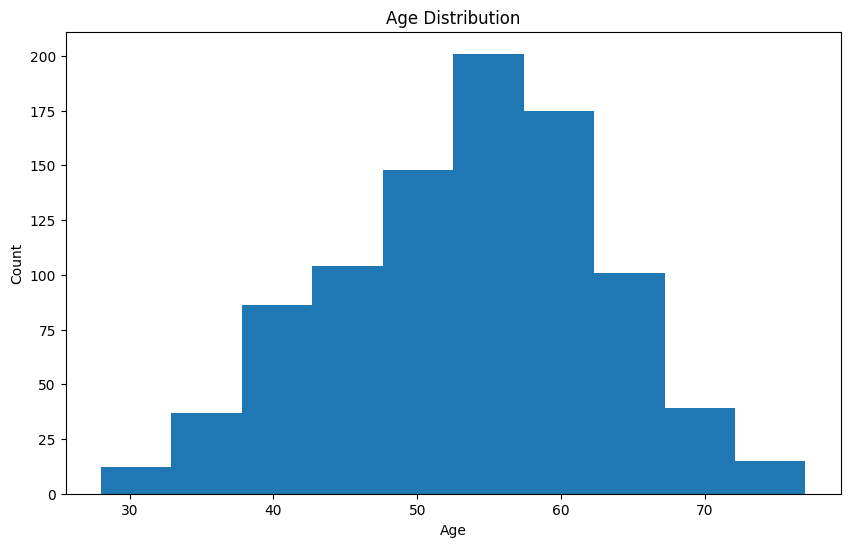

In [23]:
# Create a histogram for Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [24]:
# Calculate the mean HeartDisease for each combination of Sex and Age
Sex_Age_heart_disease = df.groupby(['Sex', 'Age'])['HeartDisease'].mean()

In [25]:
# Display the results
print(Sex_Age_heart_disease)

Sex  Age
0    28     0.0
     29     0.0
     31     1.0
     32     0.5
     33     0.0
           ... 
1    69     0.0
     71     0.0
     73     1.0
     74     0.0
     76     0.0
Name: HeartDisease, Length: 91, dtype: float64


In [26]:
# Calculate the mean HeartDisease for each Sex
sex_heart_disease = df.groupby('Sex')['HeartDisease'].mean()

In [27]:
# Display the results
print(sex_heart_disease)

Sex
0    0.631724
1    0.259067
Name: HeartDisease, dtype: float64


In [28]:
import matplotlib.pyplot as plt

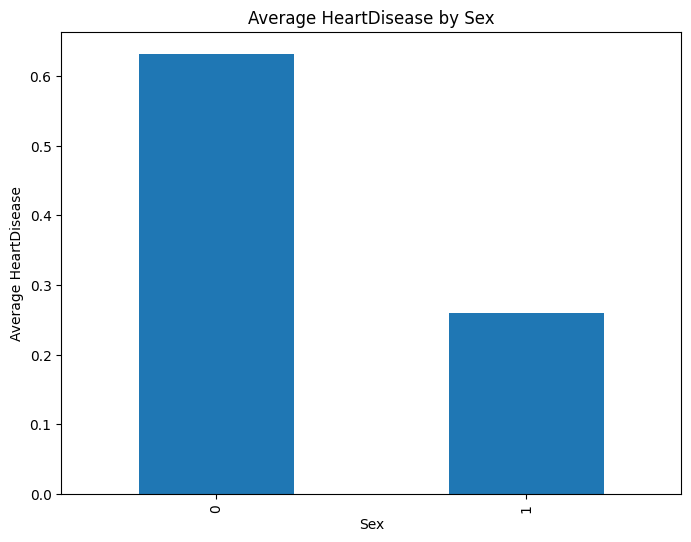

In [29]:
# Create a bar graph visualization
sex_heart_disease.plot(kind='bar', figsize=(8, 6))
plt.title('Average HeartDisease by Sex')
plt.ylabel('Average HeartDisease')
plt.show()

In [30]:
# Filter for specific conditions
filtered_df = df[(df['HeartDisease'] == 1) & (df['ExerciseAngina'] == 1)]

In [37]:
# Group by Sex and Age
grouped_df = filtered_df.groupby(['Sex', 'Age'])

In [38]:
# Count the occurrences of each combination
counts = grouped_df.size().reset_index(name='count')

In [39]:
# Display the results
print(counts)

Empty DataFrame
Columns: [Sex, Age, count]
Index: []


In [40]:
print("Number of rows with HeartDisease == 1:", (df['HeartDisease'] == 1).sum())
print("Number of rows with ExerciseAngina == 1:", (df['ExerciseAngina'] == 1).sum())

Number of rows with HeartDisease == 1: 508
Number of rows with ExerciseAngina == 1: 0


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

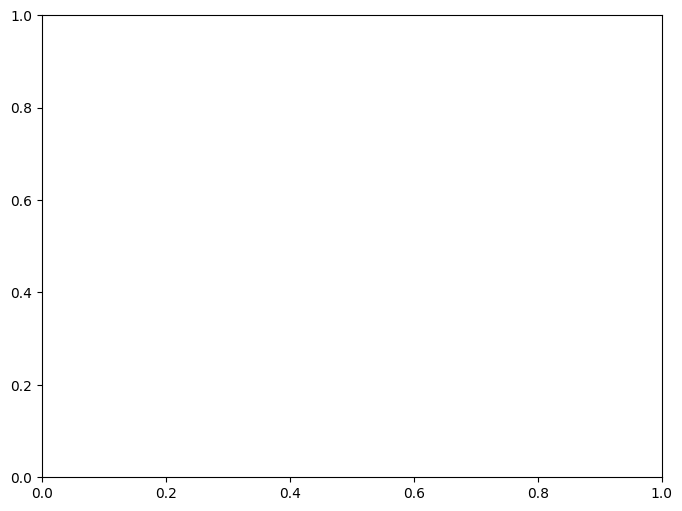

In [43]:
# Initialize the plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=counts, x='Sex', y='count', hue='Age')

Text(0.5, 1.0, 'Count of Sex and Age Combinations')

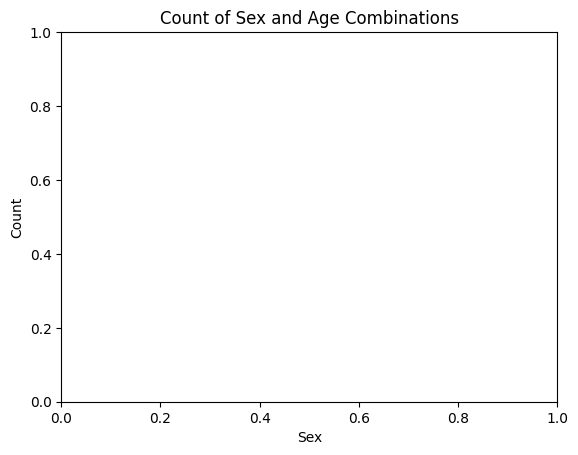

In [44]:
# Set labels
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Sex and Age Combinations')

In [45]:
# Display the plot
plt.show()

In [58]:
# Calculate summary statistics
summary_statistics = df.describe(include='all')

print("Summary statistics:\n", summary_statistics)

Summary statistics:
                Age         Sex   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918.000000  918.000000   918.000000  918.000000   
unique         NaN         NaN         NaN          NaN         NaN   
top            NaN         NaN         NaN          NaN         NaN   
freq           NaN         NaN         NaN          NaN         NaN   
mean     53.510893    0.210240  132.396514   198.799564    0.233115   
std       9.432617    0.407701   18.514154   109.384145    0.423046   
min      28.000000    0.000000    0.000000     0.000000    0.000000   
25%      47.000000    0.000000  120.000000   173.250000    0.000000   
50%      54.000000    0.000000  130.000000   223.000000    0.000000   
75%      60.000000    0.000000  140.000000   267.000000    0.000000   
max      77.000000    1.000000  200.000000   603.000000    1.000000   

             MaxHR ExerciseAngina     Oldpeak  HeartDisease ChestPainType_ATA  \
count   918.000000            918  918.000000

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# Create a DataFrame for demonstration purposes (replace with your DataFrame)
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10],
    'C': ['a', 'b', 'c', 'd', 'e']
})

In [61]:
# Select columns for box plot
columns_to_plot = ['A', 'B']

<Axes: >

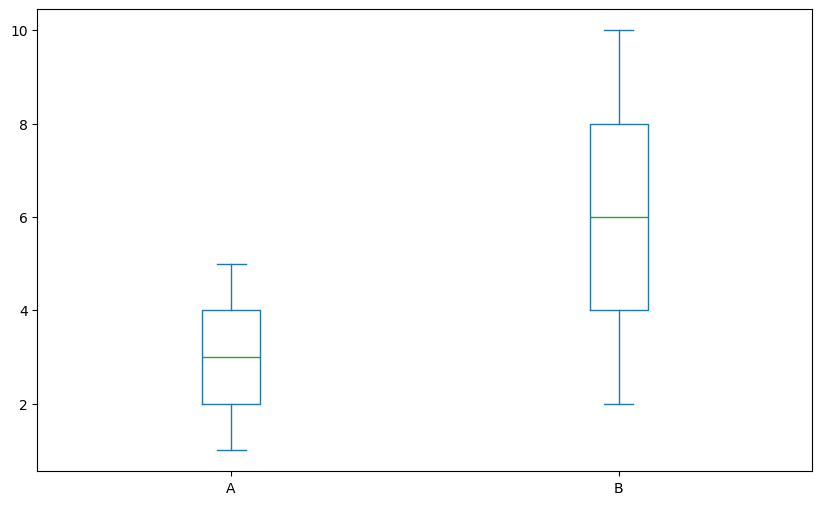

In [62]:
# Create a box plot
df[columns_to_plot].plot(kind='box', figsize=(10, 6))

Text(0.5, 1.0, 'Box Plots for Selected Columns')

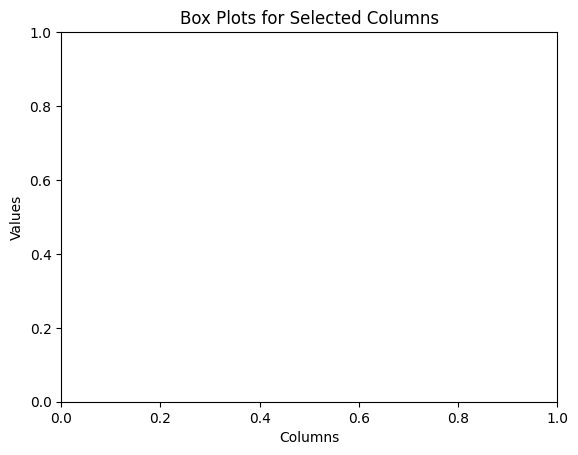

In [63]:
# Set labels
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plots for Selected Columns')

In [64]:
# Display the plot
plt.show()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
import pandas as pd

In [6]:
from google.colab import files

uploaded = files.upload()

Saving heart disease - Copy.csv to heart disease - Copy.csv


In [12]:
df = pd.read_csv('heart disease - Copy.csv')

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Group the data by Sex and ChestPainType, and count the occurrences
grouped_data = df.groupby(['Sex', 'ChestPainType']).size().reset_index(name='count')

In [15]:
# Pivot the dataframe for better plotting
pivoted_data = pd.pivot_table(grouped_data, index='Sex', columns='ChestPainType', values='count', aggfunc='sum')

In [16]:
# Convert the Sex codes back to M and F for better representation
pivoted_data.index = pivoted_data.index.map({0: 'M', 1: 'F'})

<Axes: xlabel='Sex'>

<Figure size 1000x600 with 0 Axes>

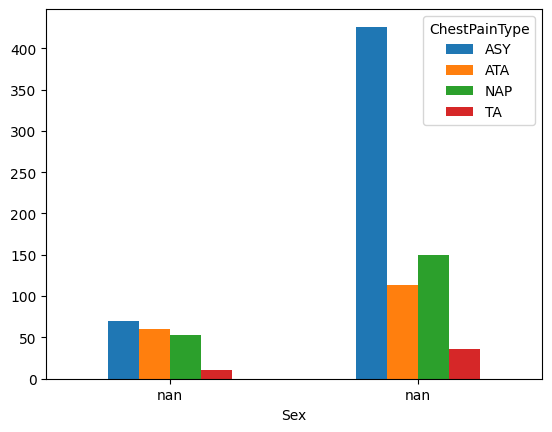

In [17]:
# Create the bar plot
plt.figure(figsize=(10, 6))
pivoted_data.plot(kind='bar', rot=0)

Text(0.5, 1.0, 'Count of ChestPainType by Sex')

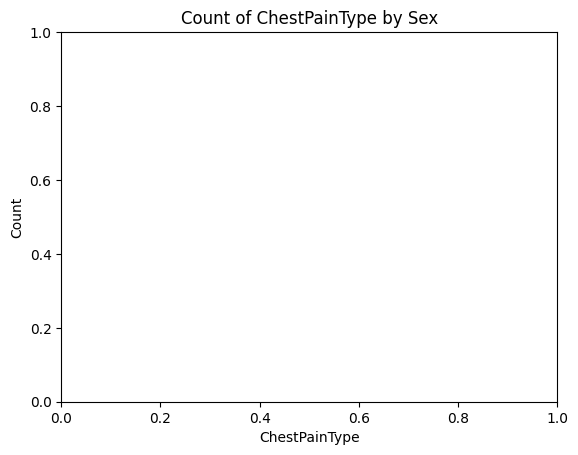

In [18]:
# Set labels and title
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.title('Count of ChestPainType by Sex')

In [19]:
# Display the plot
plt.show()